# This Jupyter-Notebook was developed by Gilvandro César de Medeiros -  Computer Engineer, Data Scientist and Master's Student in Science, Technology and Innovation (PPgCTI - UFRN) 
<h3> Contacts: 
<ul><li>gilvandro.cesar.mdrs@gmail.com</li>
<li><a href = "https://www.linkedin.com/in/gilvandromedeiros">https://www.linkedin.com/in/gilvandromedeiros/</a></li>
</ul>


In [1]:
#Importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
sns.set_theme(style="darkgrid")

In [2]:
#Loading data 
dadosVendas = pd.read_csv("Dados_Vendas_kg_FINAL.csv")

In [3]:
# dadosVendas.rename(columns = {'Mes' : 'Month', 'Ano' : 'Year', 'Data' : 'Date', 'Livre_Gluten' : 'Gluten_Free', 
#                               'Salada_de_Frutas' : 'Fruit_Salad', 'Alho' : 'Selected_Garlic', 'Bolos' : 'Cakes', 
#                               'Paes' : 'Breads', 'Paes_Crocantes' : 'Crusty_Bread', 'Carnes' : 'Beef', 
#                               'Carnes_Temperadas' : 'Spiced_Meat', 'Peixes' : 'Fish', 'Defumados' : 'Smoked', 
#                               'Dia_da_Semana' : 'Day_Week'})

#These data are not available in the public repository, they are confidential data. 
#However, the methodology applied here can be easily replicated in other databases using this source code as a base. 

In [4]:
#Converting "date" to datetime format 
dadosVendas["Data"] = pd.to_datetime(dadosVendas["Data"])

# This code block is responsible for calculating and plotting linear trends in time series 

In [5]:
#Importing linear regression model 
from sklearn.linear_model import LinearRegression

In [6]:
def printing_chart(col):
  #This fuction is used to print data on the columns with name "col" in dataframe with original data
  plt.figure(figsize = (20, 3))
  plt.plot(dadosVendas["Data"], dadosVendas[col], label = col)
  plt.axvline(dt.datetime(2020, 3, 15), ls = "--", c = "red")

  dados_antes = dadosVendas[dadosVendas["Data"] <= dt.datetime(2020, 3, 15)]
  dados_depois = dadosVendas[dadosVendas["Data"] > dt.datetime(2020, 3, 15)]
  reg_antes = LinearRegression().fit(np.array(dados_antes.index).reshape(-1, 1), dados_antes[col].values)
  reg_depois = LinearRegression().fit(np.array(dados_depois.index).reshape(-1, 1), dados_depois[col].values)

  plt.plot([dados_antes["Data"].values[0], dados_antes["Data"].values[-1]], [reg_antes.predict(np.array(dados_antes[col].index[0]).reshape(-1, 1)), reg_antes.predict(np.array(dados_antes[col].index[-1]).reshape(-1, 1))], label = "Tendência_Anterior", linewidth=6, ls = "--")
  plt.plot([dados_depois["Data"].values[0], dados_depois["Data"].values[-1]], [reg_depois.predict(np.array(dados_depois[col].index[0]).reshape(-1, 1)), reg_depois.predict(np.array(dados_depois[col].index[-1]).reshape(-1, 1))], label = "Tendência_Atual", linewidth=6, ls = "--")

  plt.yticks([])
  plt.legend()
  plt.show()

  print("Slope before the pandemic x 100 days in relation to the mean - TVR (%): ", 100 * 100 * reg_antes.coef_ / dadosVendas[col].mean())
  print("Slope after the pandemic  x 100 days in relation to the mean - TVR (%): ", 100 * 100 * reg_depois.coef_ / dadosVendas[col].mean())

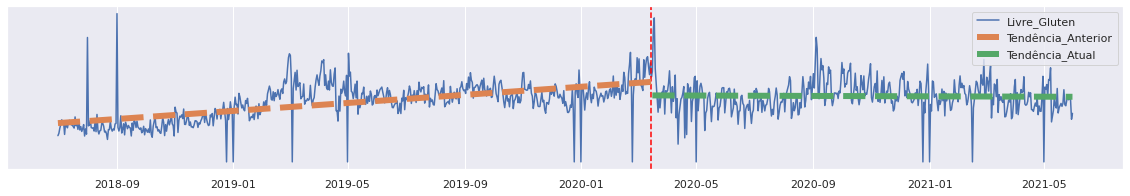

Slope before the pandemic x 100 days in relation to the mean - TVR (%):  [10.665291]
Slope after the pandemic  x 100 days in relation to the mean - TVR (%):  [-0.50679198]


In [7]:
printing_chart("Livre_Gluten")

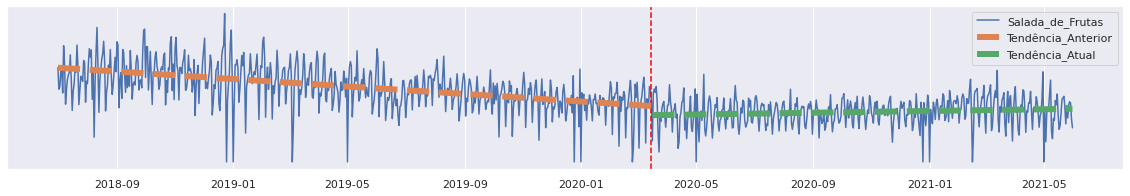

Slope before the pandemic x 100 days in relation to the mean - TVR (%):  [-9.53080935]
Slope after the pandemic  x 100 days in relation to the mean - TVR (%):  [2.21787542]


In [8]:
printing_chart("Salada_de_Frutas")

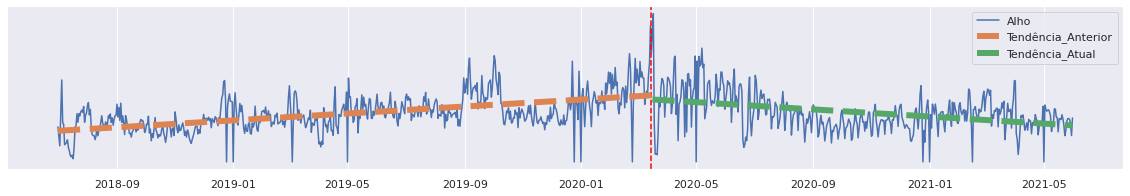

Slope before the pandemic x 100 days in relation to the mean - TVR (%):  [11.60348932]
Slope after the pandemic  x 100 days in relation to the mean - TVR (%):  [-11.96241059]


In [9]:
printing_chart("Alho")

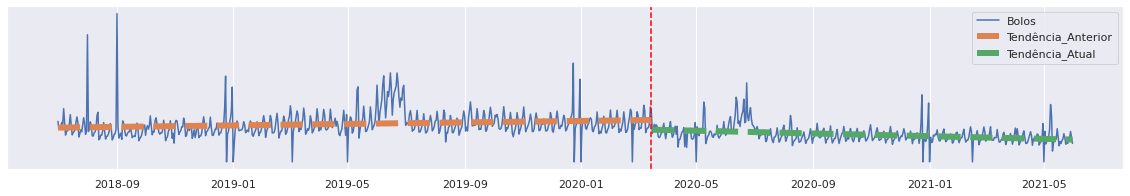

Slope before the pandemic x 100 days in relation to the mean - TVR (%):  [3.64343229]
Slope after the pandemic  x 100 days in relation to the mean - TVR (%):  [-6.64836271]


In [10]:
printing_chart("Bolos")

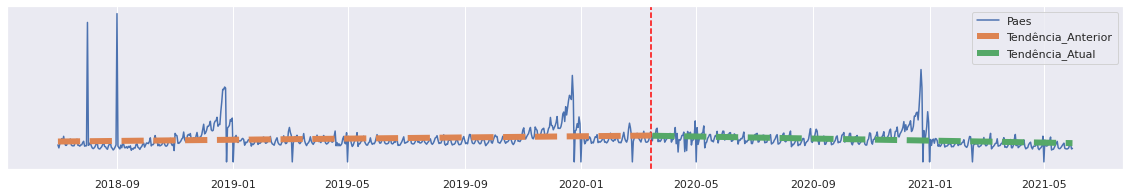

Slope before the pandemic x 100 days in relation to the mean - TVR (%):  [4.1768892]
Slope after the pandemic  x 100 days in relation to the mean - TVR (%):  [-7.29466062]


In [11]:
printing_chart("Paes")

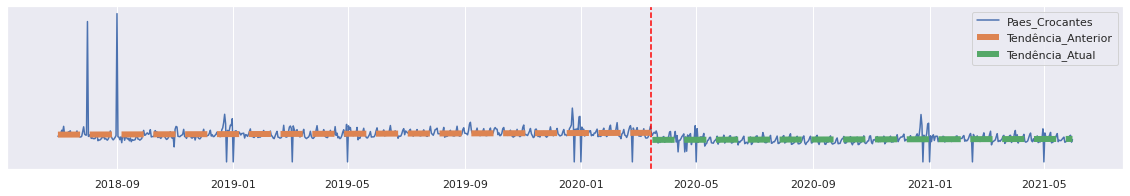

Slope before the pandemic x 100 days in relation to the mean - TVR (%):  [1.11107351]
Slope after the pandemic  x 100 days in relation to the mean - TVR (%):  [0.82165775]


In [12]:
printing_chart("Paes_Crocantes")

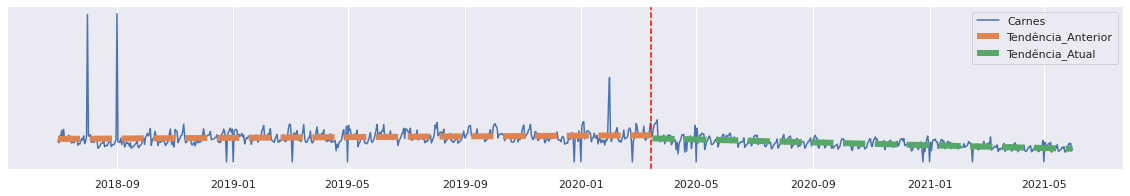

Slope before the pandemic x 100 days in relation to the mean - TVR (%):  [2.66244312]
Slope after the pandemic  x 100 days in relation to the mean - TVR (%):  [-10.66836396]


In [13]:
printing_chart("Carnes")

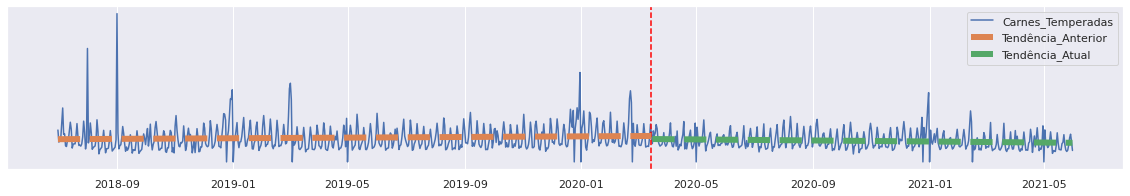

Slope before the pandemic x 100 days in relation to the mean - TVR (%):  [2.26035784]
Slope after the pandemic  x 100 days in relation to the mean - TVR (%):  [-3.7284394]


In [14]:
printing_chart("Carnes_Temperadas")

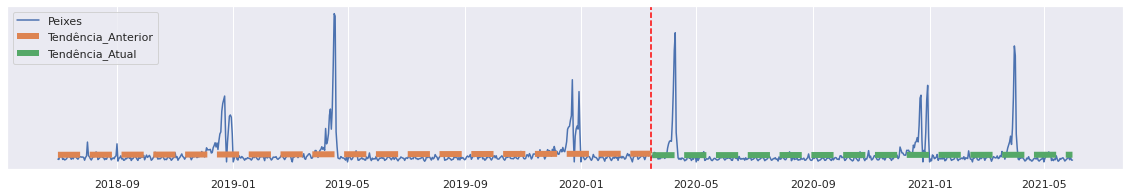

Slope before the pandemic x 100 days in relation to the mean - TVR (%):  [2.34860456]
Slope after the pandemic  x 100 days in relation to the mean - TVR (%):  [1.36432081]


In [15]:
printing_chart("Peixes")

# This code block is responsible for performing a procedure to mine association rules 

# Passo 3: Minerar regras de associação

Categorization process: <br>
Less than 25% (Q1) -> Terrible (Pessimo) <br>
Between 25% (Q1) and 50% (Q2) -> Bad (Ruim) <br>
Between 50% (Q2) and 75% (Q3) -> Regular <br>
greater than or equal to 75% (Q3) -> Good (Bom) <br> 

In [16]:
#This data will be categorized
dadosVendasCategorizados = dadosVendas.copy()

In [17]:
colunas = ['Livre_Gluten', 'Salada_de_Frutas', 'Alho', 'Bolos', 'Paes', 
           'Paes_Crocantes', 'Carnes', 'Carnes_Temperadas', 'Peixes']

In [18]:
for col in colunas:
  limiar_bom = dadosVendasCategorizados[col].quantile(0.75)
  limiar_regular = dadosVendasCategorizados[col].quantile(0.5)
  limiar_ruim = dadosVendasCategorizados[col].quantile(0.25)

  dadosVendasCategorizados[col + "_Categ"] = col + "_Bom"
  dadosVendasCategorizados.loc[dadosVendasCategorizados[col] < limiar_bom, col + "_Categ"] = col + "_Reg"
  dadosVendasCategorizados.loc[dadosVendasCategorizados[col] < limiar_regular, col + "_Categ"] = col + "_Ruim"
  dadosVendasCategorizados.loc[dadosVendasCategorizados[col] < limiar_ruim, col + "_Categ"] = col + "_Pessimo"

  dadosVendasCategorizados = dadosVendasCategorizados.drop(columns = [col])

In [19]:
dadosVendasCategorizados["Ano"] = "Ano_" + dadosVendasCategorizados["Ano"].astype(str)

In [20]:
dados_antes = dadosVendasCategorizados[dadosVendasCategorizados["Data"] <= dt.datetime(2020, 3, 15)].drop(columns = ["Data"])
dados_depois = dadosVendasCategorizados[dadosVendasCategorizados["Data"] > dt.datetime(2020, 3, 15)].drop(columns = ["Data"])

In [21]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Analyzing rules in the period before the pandemic 

In [22]:
antes_encoder = TransactionEncoder() #One hot encoder
a_data = antes_encoder.fit(dados_antes.values).transform(dados_antes.values)
df = pd.DataFrame(a_data,columns=antes_encoder.columns_)
df = df.astype(int)

In [23]:
#Extracting rules with defined minimum support of 10%, storing them in the df_support dataframe 
df_support = apriori(df, min_support = 0.1, use_colnames = True)

In [24]:
#Extracting rules from support, considering a minimum confidence of 80% 
df_rules = association_rules(df_support, metric = "confidence", min_threshold = 0.8)

#Saving rules found before the pandemic in a .csv file named "Regras_Associacao_Antes_Pandemia.csv" 
df_rules.to_csv("Regras_Associacao_Antes_Pandemia.csv", index = False)

# Analyzing rules during the pandemic 

In [25]:
depois_encoder = TransactionEncoder() #One hot encoder -> Versão apriori
a_data = depois_encoder.fit(dados_depois.values).transform(dados_depois.values)
df = pd.DataFrame(a_data,columns=depois_encoder.columns_)
df = df.astype(int)

In [26]:
#Extracting rules with defined minimum support of 10%, storing them in the df_support dataframe 
df_support = apriori(df, min_support = 0.1, use_colnames = True)

In [27]:
#Extracting rules from support, considering a minimum confidence of 80%
df_rules = association_rules(df_support, metric = "confidence", min_threshold = 0.8)

#Saving rules found during the pandemic in a .csv file named "Regras_Associacao_Depois_Pandemia.csv" 
df_rules.to_csv("Regras_Associacao_Depois_Pandemia.csv", index = False)

# From this point on, analysis of association rules identified and saved in .csv files is best analyzed from spreadsheets. In this process, it is necessary to analyze the metrics calculated for each association rule identified and analyze those that make practical sense or not. 